# Data Mining and machine Learning
# Experiment 9
## 12 March
# Name: Tufan Kundu
# Reg no.: 24MDT0184

#  Support Vector machines

## Q1. Today we will try to see how we can use SVM to perform classification on a binary classification problem.

### importing the necessary libraries

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Creating synthetic dataset using make_classification

In [7]:
x, y = make_classification(n_classes=2,       # Binary classification
                           n_features=2,      # 2 informative features
                           n_redundant=0,   
                           n_clusters_per_class=1,
                           random_state=42)

### Performing min-max scaling for the data

In [9]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

### Train test split of the data

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42)

### Plotting the synthetically generated data

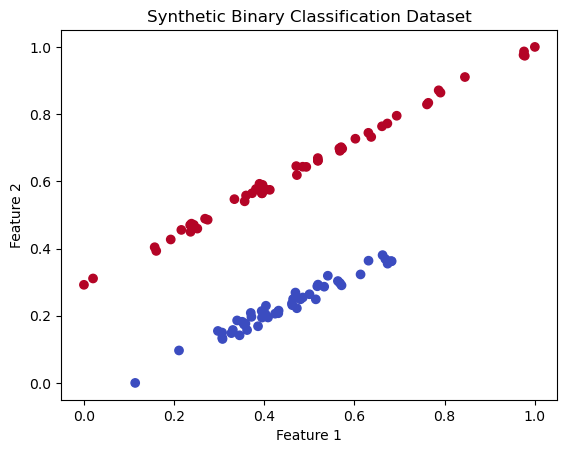

In [13]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y, cmap='coolwarm')
plt.title('Synthetic Binary Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Working with linear kernel

In [16]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_linear = accuracy_score(y_test, y_pred)
print(f'Accuracy (linear kernel): {accuracy_linear*100}%')

Accuracy (linear kernel): 100.0%


### Plotting the decision boundary

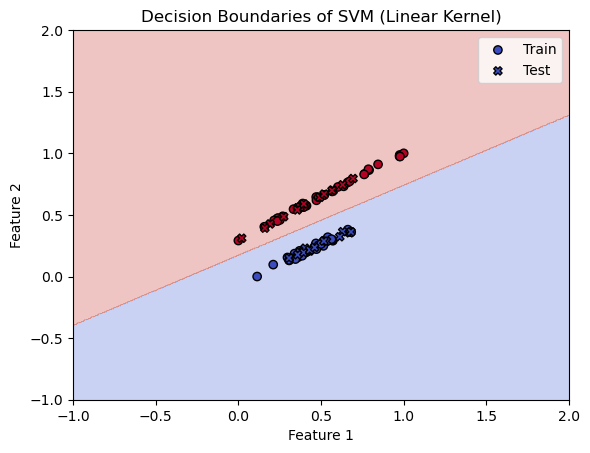

In [19]:
# Defining the range of values for plotting
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1

# Creating a meshgrid to cover the feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', label='Train', cmap='coolwarm')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='X', label='Test', cmap='coolwarm', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of SVM (Linear Kernel)')
plt.legend()
plt.show()

### Using polynomial kernel

In [21]:
svmpoly = SVC(kernel='poly', degree=2, coef0=1)
svmpoly.fit(x_train, y_train)
y_pred_poly = svmpoly.predict(x_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy (polynomial kernel): {accuracy_poly*100}%')

Accuracy (polynomial kernel): 100.0%


### Using hyper parameter tuning to find the best parameters for the SVM model

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'degree': [2, 3, 4, 5],      
    'coef0': [0, 0.5, 1, 2, 5] 
}

In [25]:
svm_poly = SVC(kernel='poly')
grid_search = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_poly_svm = grid_search.best_estimator_
print(f"Best Parameters: {best_params}")

y_pred_poly = best_poly_svm.predict(x_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f'Accuracy (polynomial kernel): {accuracy_poly*100}%')


Best Parameters: {'coef0': 0, 'degree': 2}
Accuracy (polynomial kernel): 100.0%


### Plotting the decision boundary for the best polynomial kernel

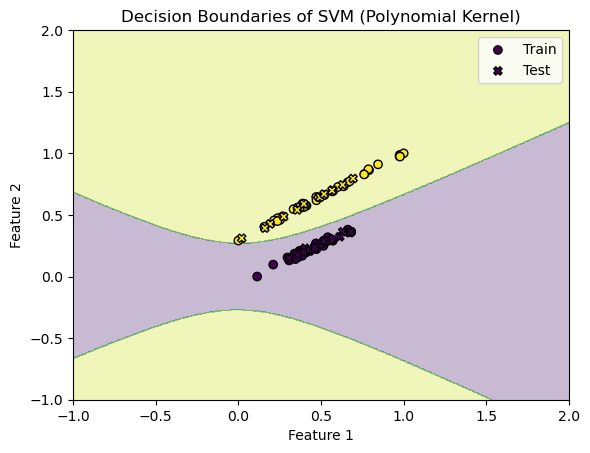

In [27]:
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1

# Creating a meshgrid to cover the feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = best_poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', label='Train', cmap='viridis')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='X', label='Test', cmap='viridis', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of SVM (Polynomial Kernel)')
plt.legend()
plt.show()

### Using rbf kernel

In [31]:
param_grid = {
    'gamma': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100] 
}

In [32]:
svm_rbf = SVC(kernel='rbf')
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_rbf_svm = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'gamma': 0.5}


In [33]:
y_pred_rbf = best_rbf_svm.predict(x_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy (RBF kernel): {accuracy_rbf*100}%')

Accuracy (RBF kernel): 100.0%


### Plotting the decision boundary

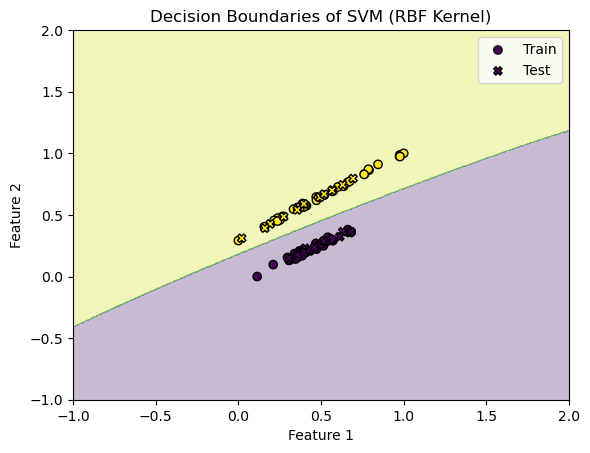

In [34]:
x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1

# Creating a meshgrid to cover the feature space
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = best_rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', label='Train', cmap='viridis')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='X', label='Test', cmap='viridis', edgecolors='k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundaries of SVM (RBF Kernel)')
plt.legend()
plt.show()

# PCA

### We will see how we can use PCA and perform regression in the book1.csv dataset which is a house price dataset.

### Loading the dataset

In [53]:
df = pd.read_csv('Book1.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished


### Dropping unnecessary column 

In [54]:
df.drop('furnishingstatus',axis = 1,inplace = True)

### Scale the data using min max scaling to obtain the data matrix X scaled.

In [55]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df)

## Fit the data using multiple regression and decision tree and find the value of mean  squared error in both the cases.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## separating x and y 
y = x_scaled[:,0]
x = x_scaled[:,1:]

## Train test split 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 
mlr = LinearRegression()
mlr.fit(x_train,y_train)
y_pred_mlr = mlr.predict(x_test)
mse_mlr = mean_squared_error(y_test,y_pred_mlr)
print(f'Mean Squared Error (Multiple Linear Regression): {mse_mlr}')

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
mse_dt = mean_squared_error(y_test,y_pred_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')


Mean Squared Error (Multiple Linear Regression): 0.02153474275305798
Mean Squared Error (Decision Tree): 0.07459797931261529


### Create a matrix which contains only the scaled feature values, not the target variable,  and name it as Xfeatures.

In [58]:
x_features = x
x_features

array([[0.35677656, 0.5       , 0.33333333, 0.66666667, 0.66666667],
       [0.46959707, 0.5       , 1.        , 1.        , 1.        ],
       [0.54285714, 0.25      , 0.33333333, 0.33333333, 0.66666667],
       ...,
       [0.07106227, 0.25      , 0.        , 0.        , 0.        ],
       [0.42857143, 0.5       , 0.        , 1.        , 1.        ],
       [0.11355311, 0.        , 0.33333333, 0.        , 0.        ]])

### Now let us use PCA to reduce the features we have in our data to three features or a  3-dimensional data.

In [63]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_features)
x_pca[:5]

array([[ 0.29884765,  0.41617658,  0.10552369],
       [ 0.7104956 ,  0.8790014 ,  0.52224232],
       [-0.06582904,  0.40339604,  0.07976576],
       [-0.05882541,  0.71326852,  0.13934483],
       [-0.08816164,  0.34360508, -0.08366533]])

### Perform train test split and fit the models and find the errors in the case of both the  models, multiple regression and decision tree by using the new three features we have obtained using PCA.

### Train test split

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

## Multiple Linear regression
mlr_pca = LinearRegression()
mlr_pca.fit(x_train,y_train)
y_pred_mlr_pca = mlr_pca.predict(x_test)
mse_mlr_pca = mean_squared_error(y_test,y_pred_mlr_pca)
print(f'Mean Squared Error (Multiple Linear Regression with PCA): {mse_mlr_pca}')

## Decision Tree
dt_pca = DecisionTreeRegressor()
dt_pca.fit(x_train,y_train)
y_pred_dt_pca = dt_pca.predict(x_test)
mse_dt_pca = mean_squared_error(y_test,y_pred_dt_pca)
print(f'Mean Squared Error (Decision Tree with PCA): {mse_dt_pca}')


Mean Squared Error (Multiple Linear Regression with PCA): 0.023257890381643484
Mean Squared Error (Decision Tree with PCA): 0.06691854379020987


In [65]:
print(f'Mean Squared Error (Multiple Linear Regression): {mse_mlr}')
print(f'Mean Squared Error (Multiple Linear Regression with PCA): {mse_mlr_pca}')
print(f'Mean Squared Error (Decision Tree): {mse_dt}')
print(f'Mean Squared Error (Decision Tree with PCA): {mse_dt_pca}')


Mean Squared Error (Multiple Linear Regression): 0.02153474275305798
Mean Squared Error (Multiple Linear Regression with PCA): 0.023257890381643484
Mean Squared Error (Decision Tree): 0.07459797931261529
Mean Squared Error (Decision Tree with PCA): 0.06691854379020987


## `PCA slightly reduced performance for Multiple Linear Regression but improved Decision Tree by minimizing overfitting`